In [1]:
from typing import List, Union
import numpy as np

# Lasso just adds L1 regularization
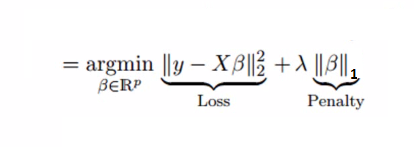

In [2]:
class LinRegLasso:
    def _init(self, n_feat: int) -> None:
        self.weights = np.ones((n_feat + 1)) # (n_feat + 1,) weights + bias
        
    def predict(self, feature_vector: Union[np.ndarray, List[int]]) -> float:
        '''
        feature_vector may be a list or have shape (n_feat,)
        or it may be a bunch of vectors (n_vec, nfeat)
        '''
        feature_vector = np.array(feature_vector)
        assert feature_vector.shape[-1] == self.weights.shape[0] - 1
        if len(feature_vector.shape) == 1:
            feature_vector = feature_vector[np.newaxis,]
        
        return self.weights @ np.concatenate((feature_vector.T, [[1]*feature_vector.shape[0]]))
    
    def mse(self, X, Y):
        Y_hat = self.predict(X)
        return np.sum((Y - Y_hat)**2) / Y.shape[0]

    def _update_weights(self, X, Y, lr, wd):
        '''
        X: (n_samples, n_features)
        Y: (n_samples,)
        self.weights: (n_features + 1)
        
        Cost function is MSE: (y - W*X - b)**2;
        its derivative with resp to any x is -2*X*(y - W*X - b),
        and with resp to b is -2*(y - W*X - b).
        
        Regularisation function is L1 |W|;
        its derivative is SIGN(w)
        '''
        predictions = self.predict(X)
        error = Y - predictions # (n_samples,)
        X_with_bias = np.concatenate((X.T, [[1]*X.shape[0]])).T
        updates = -2 * X_with_bias.T @ error / Y.shape[0]
        regression_term = np.sign(self.weights)
        
        self.weights -= lr * updates + wd * regression_term
    
    def fit(self, X, Y, n_epochs: int, lr: float, wd: float):
        self._init(X.shape[-1])
        for i in range(n_epochs):
            self._update_weights(X, Y, lr, wd)
            mse = self.mse(X, Y)
            print(f'epoch: {i}, \t MSE: {mse}')
            

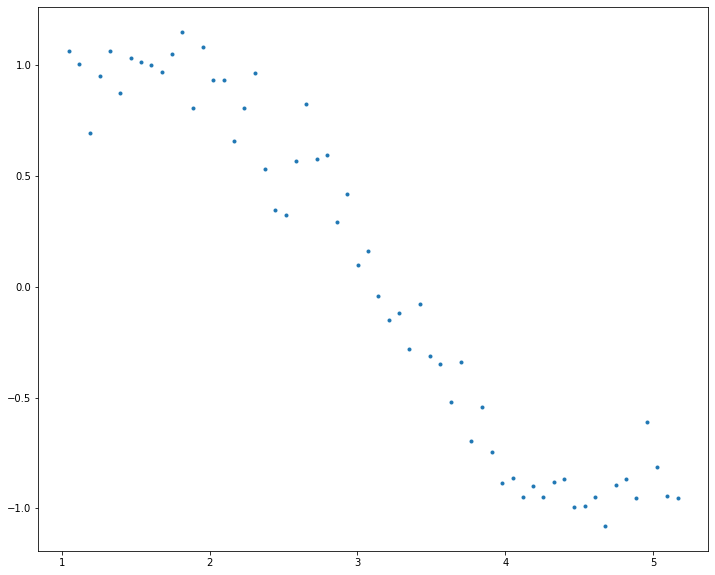

In [3]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
plt.plot(x,y,'.')

In [9]:
lrs = LinRegLasso()
alpha = 0.0001
lr = 0.08
epochs = 100

lrs.fit(x[:,np.newaxis],y, epochs, lr, alpha)
lrs.weights

epoch: 0, 	 MSE: 17.28968604018978
epoch: 1, 	 MSE: 14.626147202039622
epoch: 2, 	 MSE: 12.378658694531488
epoch: 3, 	 MSE: 10.479716191022815
epoch: 4, 	 MSE: 8.877331485218843
epoch: 5, 	 MSE: 7.523061332680313
epoch: 6, 	 MSE: 6.380218738551775
epoch: 7, 	 MSE: 5.413992777056065
epoch: 8, 	 MSE: 4.598539218214396
epoch: 9, 	 MSE: 3.9088044230822674
epoch: 10, 	 MSE: 3.3266204439073426
epoch: 11, 	 MSE: 2.833923743313259
epoch: 12, 	 MSE: 2.4179748665052587
epoch: 13, 	 MSE: 2.065723301420112
epoch: 14, 	 MSE: 1.7682633907098035
epoch: 15, 	 MSE: 1.5161442311623887
epoch: 16, 	 MSE: 1.3017589498895028
epoch: 17, 	 MSE: 1.1212745163895848
epoch: 18, 	 MSE: 0.9675475720623493
epoch: 19, 	 MSE: 0.8381392683863532
epoch: 20, 	 MSE: 0.7276930057626166
epoch: 21, 	 MSE: 0.6347172215712844
epoch: 22, 	 MSE: 0.555169674708247
epoch: 23, 	 MSE: 0.48819497063429
epoch: 24, 	 MSE: 0.4307222812313734
epoch: 25, 	 MSE: 0.3823168375814191
epoch: 26, 	 MSE: 0.3406294855489011
epoch: 27, 	 MSE: 0.30

array([-0.56595009,  1.77424978])

# Just to check the result we can use scikit-learn
The difference may be explained by lr scheduler in scikit probably

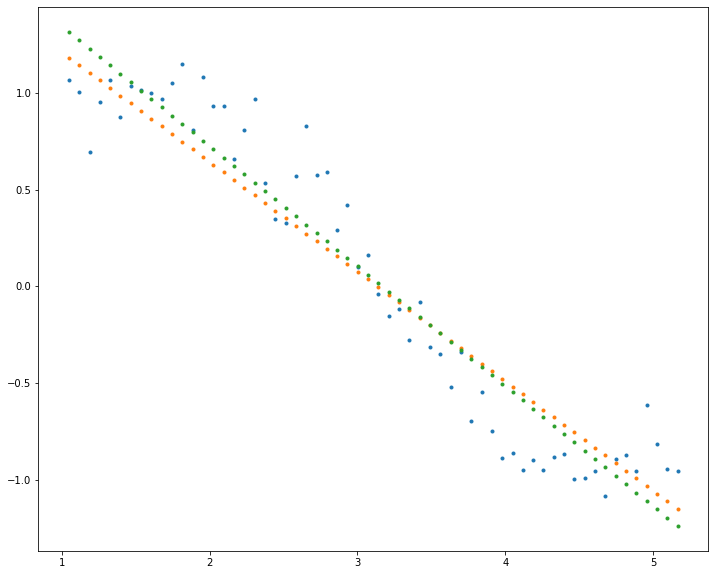

In [10]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=alpha, max_iter=epochs)
lassoreg.fit(x[:,np.newaxis],y)
y_pred = lassoreg.predict(x[:,np.newaxis])

y_hat = lrs.predict(x[:,np.newaxis])
plt.plot(x,y,'.')
plt.plot(x,y_hat,'.')
plt.plot(x,y_pred,'.')